o:\programs\perfect-physics\perfect_physics\_misc.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


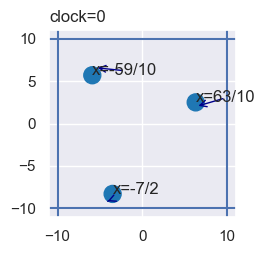

In [2]:
import numpy as np
from perfect_physics import World, Circle, Wall
from sympy import S

from pathlib import Path
root = Path("m:/projects/perfect_physics")

def box_world(seed = 0, resolution=10, wall_point = 10, circle_count = 3):

    wall_list = [
        Wall(-wall_point, -wall_point, -wall_point, wall_point),
        Wall(-wall_point, wall_point, wall_point, wall_point),
        Wall(wall_point, wall_point, wall_point, -wall_point),
        Wall(wall_point, -wall_point, -wall_point, -wall_point),
    ]

    rng = np.random.default_rng(seed)

    def random_point(rng, range, resolution):
        return S(rng.integers(-range*resolution, range*resolution,endpoint=True))/resolution

    circle_list = []
    for i in range(circle_count):
        good = False
        while not good:
            good = True
            possible = Circle( 
                x=random_point(rng, wall_point-1, resolution),
                y=random_point(rng, wall_point-1, resolution),
                r=1,
                vx=random_point(rng, 1, resolution),
                vy=random_point(rng, 1, resolution),
                m=1,
            )
            for circle in circle_list:
                if circle.distance(possible) < circle.r + possible.r:
                    good = False
                    break
        circle_list.append(possible)

    world = World(
        circle_list=circle_list,
        wall_list=wall_list,
        rng=rng,
        xlim=(-wall_point - 1, wall_point + 1),
        ylim=(-wall_point - 1, wall_point + 1),
    )
    return world
world = box_world()
world.show(label_fun=lambda c: f"x={c.x}")
pass

In [1]:
world = box_world(seed=1)
world.run_in_place(10,show=True,label_fun=lambda c: f"x={c.x}")

NameError: name 'box_world' is not defined

In [4]:
folder = root / f"part5/grow"
world = box_world(seed=1)
world.run_to_file(folder, 10)
World.render(folder, speed_up=5, draw_radius=0.9, label_fun=lambda c: f"x={c.x}")


Moviepy - Building video m:\projects\perfect_physics\part5\grow\render\grow.avi.
MoviePy - Writing audio in growTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video m:\projects\perfect_physics\part5\grow\render\grow.avi



Moviepy - Done !
Moviepy - video ready m:\projects\perfect_physics\part5\grow\render\grow.avi


In [6]:
world.circle_list

[Circle(x=63/10, y=-57484987191/1837245334 + 211907289*sqrt(15051)/918622667, r=1, vx=0, vy=1/2, m=1, id=UUID('7eee28c7-3add-458b-8732-e8ecabfc0637')),
 Circle(x=112193164513/1837245334 - 5145569071*sqrt(15051)/9186226670, y=39306654266/4593113335 - 211907289*sqrt(15051)/4593113335, r=1, vx=-133497/198500 + 2983*sqrt(15051)/397000, vy=-471*sqrt(15051)/198500 - 111031/397000, m=1, id=UUID('0f66fae6-d9ee-40e3-a5c2-22c4758028f7')),
 Circle(x=-29642775691/9186226670 - 11958827*sqrt(15051)/1837245334, y=-9, r=1, vx=104703/198500 + 2983*sqrt(15051)/397000, vy=71331/397000 + 471*sqrt(15051)/198500, m=1, id=UUID('639bab4a-dabe-4185-aee6-fd65256f4aec'))]